<a href="https://colab.research.google.com/github/pankaj09318/Concepts-and-technologies-of-AI/blob/main/Worksheet_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Load the Dataset:

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

2. Handle Missing Data:

• Handle any missing values appropriately, either by dropping or imputing them based on the data.

3. Feature Engineering:

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

4. Implement KNN:

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

  – Predicting the class for a single query.

  – Predicting classes for all test samples.

• Evaluate the performance using accuracy.

In [1]:
import pandas as pd
import numpy as np

#Loading dataset and performing EDA

data = pd.read_csv('/content/drive/MyDrive/Dataset-Week2/Dataset/diabetes_.csv')
df = pd.DataFrame(data)

print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nSummary statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Handling missing data
missing_info = df.isnull().sum() / len(df) * 100
df.dropna()

#Feature Engineering
import numpy as np

# Separate features and target
x = df.drop(columns=['Outcome'], axis=1).values
y = df['Outcome'].values

# Train-test split (70% train, 30% test)
def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Implement KNN:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def knn_predict_single(query, X_train, y_train, k=5):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

# Predict classes for all test samples
def knn_predict(X_test, X_train, y_train, k=5):
  return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

# Accuracy function
def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    X_test_sample = X_test[:5]
    y_test_sample = y_test[:5]
    predictions = knn_predict(X_test_sample, X_train, y_train, k=5)
    print("Predictions for sample test set:", predictions)
    print("Actual labels:", y_test_sample)
    assert predictions.shape == y_test_sample.shape, "Predictions shape mismatch"
    print("Sample test case passed!")
except AssertionError as ae:
    print(f"AssertionError: {ae}")
except Exception as e:
    print(f"Test case error: {e}")

# Run KNN
try:
    y_pred = knn_predict(X_test, X_train, y_train, k=5)
    acc = compute_accuracy(y_test, y_pred)
    print(f"Accuracy of KNN on the test set: {acc:.2f}%")
except Exception as e:
    print(f"Error during prediction or accuracy computation: {e}")

First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null  

Problem 2


1. Repeat the Classification Task:

• Scale the Feature matrix X.

• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

2. Comparative Analysis: Compare the Results -

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.

Problem - 3 - Experimentation with k:

1. Vary the number of neighbors - k:

• Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

2. Visualize the Results:

• Plot the following graphs:

– k vs. Accuracy for original and scaled datasets.

– k vs. Time Taken for original and scaled datasets.

3. Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

In [2]:

X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y, test_size=0.3)

def euclidean_distance(x1, x2):
  if x1.shape != x2.shape:
    raise ValueError("Points must have the same dimensions")
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

def knn_predict_single(query, X_train, y_train, k=5):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=5):
  return np.array([knn_predict_single(x, X_train, y_train, k) for x in X_test])

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=5)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)
print(f"Accuracy of KNN with scaled features: {accuracy_scaled:.2f}%")





Accuracy of KNN with scaled features: 67.83%


Accuracy of KNN on original data: 68.70%
Accuracy of KNN on scaled data: 67.83%
Accuracy for k=1: 68.70%, Time taken: 1.0398 seconds
Accuracy for k=2: 72.61%, Time taken: 1.0345 seconds
Accuracy for k=3: 67.39%, Time taken: 0.6087 seconds
Accuracy for k=4: 72.17%, Time taken: 0.5782 seconds
Accuracy for k=5: 68.70%, Time taken: 0.6107 seconds
Accuracy for k=6: 70.00%, Time taken: 0.6053 seconds
Accuracy for k=7: 69.13%, Time taken: 0.5864 seconds
Accuracy for k=8: 71.30%, Time taken: 0.6055 seconds
Accuracy for k=9: 70.00%, Time taken: 0.5782 seconds
Accuracy for k=10: 71.74%, Time taken: 0.6057 seconds
Accuracy for k=11: 73.04%, Time taken: 0.5837 seconds
Accuracy for k=12: 73.91%, Time taken: 0.6362 seconds
Accuracy for k=13: 74.35%, Time taken: 0.6150 seconds
Accuracy for k=14: 72.61%, Time taken: 0.5927 seconds
Accuracy for k=15: 73.91%, Time taken: 0.6097 seconds
Accuracy for k=1: 67.39%, Time taken: 0.5857 seconds
Accuracy for k=2: 67.83%, Time taken: 0.6102 seconds
Accuracy for 

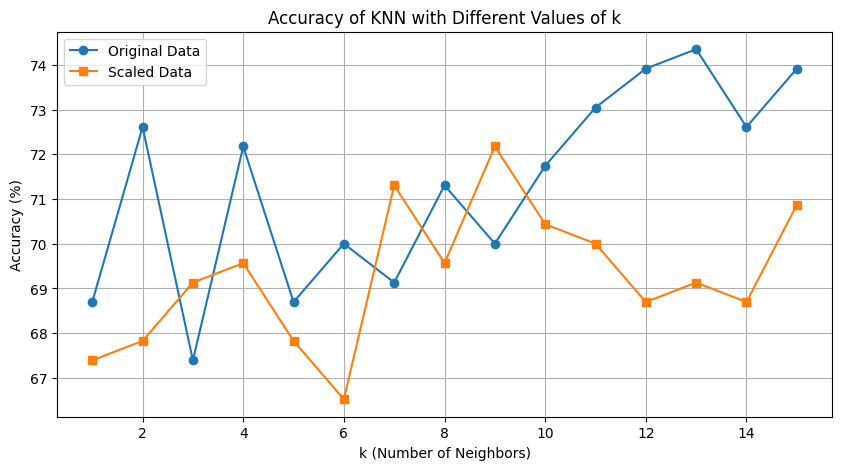

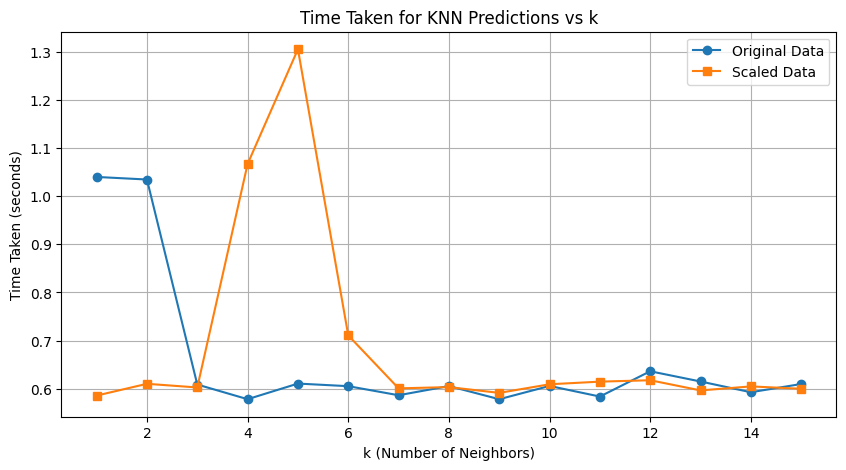

In [3]:
import matplotlib.pyplot as plt
import time


X = df.drop(columns=["Outcome"]).values
y = df["Outcome"].values

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_scaled = (X - X_min) / (X_max - X_min)

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    test_split_size = int(len(x) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = x[train_indices], x[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split_scratch(X, y)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X_scaled, y)

def euclidean_distance(x1, x2):
  if x1.shape != x2.shape:
    raise ValueError("Points must have the same dimensions")
  distance = np.sqrt(np.sum((x1 - x2) ** 2))
  return distance

def knn_predict_single(query, X_train, y_train, k=5):
    distances = [euclidean_distance(query, x) for x in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

def knn_predict(X_test, X_train, y_train, k=5):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def compute_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

y_pred_orig = knn_predict(X_test_orig, X_train_orig, y_train_orig, k=5)
accuracy_orig = compute_accuracy(y_test_orig, y_pred_orig)
print(f"Accuracy of KNN on original data: {accuracy_orig:.2f}%")

y_pred_scaled = knn_predict(X_test_scaled, X_train_scaled, y_train_scaled, k=5)
accuracy_scaled = compute_accuracy(y_test_scaled, y_pred_scaled)
print(f"Accuracy of KNN on scaled data: {accuracy_scaled:.2f}%")

def experiment_knn_k_values(X_train, y_train, X_test, y_test, k_values):
    accuracies = {}
    times = {}
    for k in k_values:
        start_time = time.time()
        predictions = knn_predict(X_test, X_train, y_train, k=k)
        end_time = time.time()
        time_taken = end_time - start_time
        accuracy = compute_accuracy(y_test, predictions)
        accuracies[k] = accuracy
        times[k] = time_taken
        print(f"Accuracy for k={k}: {accuracy:.2f}%, Time taken: {time_taken:.4f} seconds")
    return accuracies, times
k_values = range(1, 16)

accuracies_orig, times_orig = experiment_knn_k_values(X_train_orig, y_train_orig, X_test_orig, y_test_orig, k_values)
accuracies_scaled, times_scaled = experiment_knn_k_values(X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, k_values)

plt.figure(figsize=(10,5))
plt.plot(k_values, list(accuracies_orig.values()), marker='o', label='Original Data')
plt.plot(k_values, list(accuracies_scaled.values()), marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of KNN with Different Values of k')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_values, list(times_orig.values()), marker='o', label='Original Data')
plt.plot(k_values, list(times_scaled.values()), marker='s', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Taken for KNN Predictions vs k')
plt.legend()
plt.grid(True)
plt.show()

In this experiment, different values of k ranging from 1 to 15 were tested on both the original and scaled datasets. The results showed that very small values of k (1–3) produced unstable accuracy, while intermediate values of k (approximately 7–12) led to better and more consistent performance. The highest accuracy, close to 74%, was obtained using the scaled dataset when k was between 12 and 15. This clearly indicates that the selection of k plays an important role in determining both the classification accuracy and the computational cost of the KNN algorithm.